 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



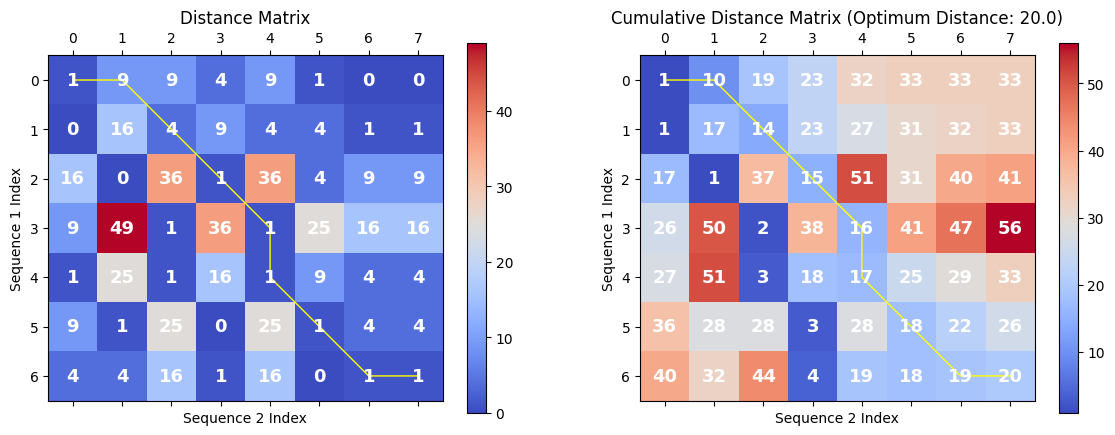

In [3]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################

    #Initialize the distance matrix
    n , m = len(sequence1),len(sequence2)
    D = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            D[i,j] = (sequence1[i]-sequence2[j])**2     # Compute the euclidean distance between the two points

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((n,m))    #Cummulative distance matrix

    # Initialize the parent matrix to store the path
    parent = np.zeros((n,m,2))    #Parent matrix to store the path

    DTW_cumulate_Matrix[0,0] = D[0,0]        #Initialize the first element of the cumulative distance matrix

    for i in range(1,n,1):
        DTW_cumulate_Matrix[i,0] = D[i,0] + DTW_cumulate_Matrix[i-1,0]  #Compute the first column of the cumulative distance matrix

    for j in range(1,m,1):
        DTW_cumulate_Matrix[0,j] = D[0,j] + DTW_cumulate_Matrix[0,j-1]  #Compute the first row of the cumulative distance matrix

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,n,1):
        for j in range(1,m,1):
            DTW_cumulate_Matrix[i,j] = D[i,j] + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            prev = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]])
            parent[i,j] = [i-1,j] if prev==0 else [i-1,j-1] if prev==1 else [i,j-1]


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = n-1 # length of the sequence1
    j = m-1 # length of the sequence2
    opt_path = []
    while i!=0 or j!=0: #Start from the last point and backtrack (last point is bottom right point)
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        # Add the current indexes distance
        # print(i,j)
        opt_distance = opt_distance + D[i,j]   #Compute the distance between the points sequence1[i] and sequence2[j]
        opt_path.append([i,j])

        i , j = parent[i,j][0] , parent[i,j][1]
        i,j = (int)(i) , (int)(j)

        #Store the required indexes to obtain the optimal path

    opt_path.append([0,0])
    opt_distance = opt_distance + D[0,0]
    # Reverse the path to get the correct order
    opt_path = opt_path[::-1]


    # print(D)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return opt_distance, opt_path , D, DTW_cumulate_Matrix

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates

    #Obtain the optimal path using "DTW" function
    opt_dist , path , D , DTW_cumulate_Matrix = DTW(sequence1,sequence2)

    #Get the indexes of the optimal path
    path_x = [path[i][0] for i in range(len(path))]
    path_y = [path[i][1] for i in range(len(path))]

    fig, ax = plt.subplots(1, 2, figsize=(14, 8))

    cax1 = ax[0].matshow(D, cmap='coolwarm')
    fig.colorbar(cax1, ax=ax[0], shrink = 0.6)
    ax[0].plot(path_y, path_x, color="yellow", linewidth=1)
    for i in range(len(D)):
        for j in range(len(D[0])):
            ax[0].text(j, i, str(int(D[i][j])), ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    ax[0].set_title("Distance Matrix")
    ax[0].set_xlabel("Sequence 2 Index")
    ax[0].set_ylabel("Sequence 1 Index")

    cax2 = ax[1].matshow(DTW_cumulate_Matrix, cmap='coolwarm')
    fig.colorbar(cax2, ax=ax[1], shrink = 0.6)
    ax[1].plot(path_y, path_x, color="yellow", linewidth=1)
    for i in range(len(DTW_cumulate_Matrix)):
        for j in range(len(DTW_cumulate_Matrix[0])):
            ax[1].text(j, i, str(int(DTW_cumulate_Matrix[i][j])), ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    ax[1].set_title(f'Cumulative Distance Matrix (Optimum Distance: {opt_dist})')
    ax[1].set_xlabel("Sequence 2 Index")
    ax[1].set_ylabel("Sequence 1 Index")

    plt.show()



A=[4,3,7,0,2,6,5]
B=[3,7,1,6,1,5,4,4]
plotDTWpath(A,B)


<b> Report your observations </b>

1.

2.

3.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

## Usage Instructions

Before proceeding, make sure you have downloaded the necessary files that I've attached from Google Classroom. The files you need are:
- `MultiSpeakerDigitData_modified.zip`
- `my_recordings.zip`

Please follow these steps to use the files in your Google Colab environment:

1. **Upload Zip Files**:
   - Upload the `MultiSpeakerDigitData_modified.zip` and `my_recordings.zip` to your Google Drive, specifically into the `MyDrive` folder.

2. **Mount Google Drive in Colab**:
   - Mount your Google Drive within the Colab environment to access the uploaded zip files directly from your notebook. Use the following code to do this:

   ```python
   from google.colab import drive
   drive.mount('/content/drive')

3. **Unzip the Data Sets**:
   - Once your drive is mounted, use the following commands to unzip the data sets directly into the Colab environment. This will extract the contents of each zip file into your current working directory.

   ```python
   # Unzip the TDIGITS dataset
   !unzip '/content/drive/MyDrive/MultiSpeakerDigitData_modified.zip'
   
   # Unzip my personal recordings
   !unzip '/content/drive/MyDrive/my_recordings.zip'

4. The /content folder of the collab file should look like this:


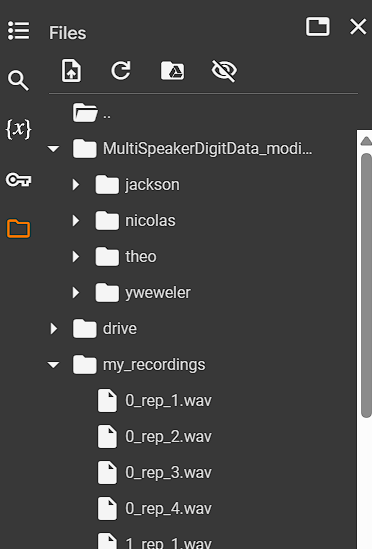

In [4]:
# ###### UNCOMMENT THIS #######
# ###### My Recording and TDIGITS data sets will be extracted from drive here #####

# # Mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Unzip the file
# !unzip '/content/drive/MyDrive/MultiSpeakerDigitData_modified.zip'

# !unzip '/content/drive/My Drive/my_recordings.zip'

In [5]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

ModuleNotFoundError: No module named 'google'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# !unzip '/content/drive/My Drive/my_recordings.zip'

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# !rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio('recording.wav', autoplay=True)
display(wn)

Recording the digits


<IPython.core.display.Javascript object>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio
import librosa

# Loop through each digit and record 4 repetitions -  The first repitation will be used as reference and rest for testing
for digit in range(10):  # Loop over digits 0-9

    if(digit==0):
      print(f"Test Recording .... ")
      wav = record(2.0) #It will record 3 seconds of your speech. You can change the duration.
      wav = wav.set_frame_rate(16000)
      sig=wav.get_array_of_samples()
      samples=np.array(sig).T.astype(np.float32)
      fp_arr = np.array(samples).T.astype(np.float32)
      fp_arr /= np.iinfo(sig.typecode).max
      fp_arr,_ = librosa.effects.trim(fp_arr, top_db=20, frame_length=2048, hop_length=512)
      # scipy.io.wavfile.write(file_path, 16000, fp_arr)  # Save the recording

    for rep in range(1, 5):  # 4 repetitions for each digit
        file_name = f"{digit}_rep_{rep}.wav"
        file_path = os.path.join('my_recordings/', file_name)

        if os.path.isfile(file_path):
            print(f"Wave file for digit {digit} repetition {rep} exists, skipping recording.")
        else:
            print(f"Recording digit {digit} repetition {rep}")
            wav = record(2.0) #It will record 3 seconds of your speech. You can change the duration.
            wav = wav.set_frame_rate(16000)
            sig=wav.get_array_of_samples()
            samples=np.array(sig).T.astype(np.float32)
            fp_arr = np.array(samples).T.astype(np.float32)
            fp_arr /= np.iinfo(sig.typecode).max
            fp_arr,_ = librosa.effects.trim(fp_arr, top_db=20, frame_length=2048, hop_length=512)
            scipy.io.wavfile.write(file_path, 16000, fp_arr)  # Save the recording

        # Play the recording
        wn = Audio(file_path, autoplay=False)
        display(wn)

Test Recording .... 


<IPython.core.display.Javascript object>

Wave file for digit 0 repetition 1 exists, skipping recording.


Wave file for digit 0 repetition 2 exists, skipping recording.


Wave file for digit 0 repetition 3 exists, skipping recording.


Wave file for digit 0 repetition 4 exists, skipping recording.


Wave file for digit 1 repetition 1 exists, skipping recording.


Wave file for digit 1 repetition 2 exists, skipping recording.


Wave file for digit 1 repetition 3 exists, skipping recording.


Wave file for digit 1 repetition 4 exists, skipping recording.


Wave file for digit 2 repetition 1 exists, skipping recording.


Wave file for digit 2 repetition 2 exists, skipping recording.


Wave file for digit 2 repetition 3 exists, skipping recording.


Wave file for digit 2 repetition 4 exists, skipping recording.


Wave file for digit 3 repetition 1 exists, skipping recording.


Wave file for digit 3 repetition 2 exists, skipping recording.


Wave file for digit 3 repetition 3 exists, skipping recording.


Wave file for digit 3 repetition 4 exists, skipping recording.


Wave file for digit 4 repetition 1 exists, skipping recording.


Wave file for digit 4 repetition 2 exists, skipping recording.


Wave file for digit 4 repetition 3 exists, skipping recording.


Wave file for digit 4 repetition 4 exists, skipping recording.


Wave file for digit 5 repetition 1 exists, skipping recording.


Wave file for digit 5 repetition 2 exists, skipping recording.


Wave file for digit 5 repetition 3 exists, skipping recording.


Wave file for digit 5 repetition 4 exists, skipping recording.


Wave file for digit 6 repetition 1 exists, skipping recording.


Wave file for digit 6 repetition 2 exists, skipping recording.


Wave file for digit 6 repetition 3 exists, skipping recording.


Wave file for digit 6 repetition 4 exists, skipping recording.


Wave file for digit 7 repetition 1 exists, skipping recording.


Wave file for digit 7 repetition 2 exists, skipping recording.


Wave file for digit 7 repetition 3 exists, skipping recording.


Wave file for digit 7 repetition 4 exists, skipping recording.


Wave file for digit 8 repetition 1 exists, skipping recording.


Wave file for digit 8 repetition 2 exists, skipping recording.


Wave file for digit 8 repetition 3 exists, skipping recording.


Wave file for digit 8 repetition 4 exists, skipping recording.


Wave file for digit 9 repetition 1 exists, skipping recording.


Wave file for digit 9 repetition 2 exists, skipping recording.


Wave file for digit 9 repetition 3 exists, skipping recording.


Wave file for digit 9 repetition 4 exists, skipping recording.


**Algorithm to perform isolated digit recognition**

In [6]:
%pip -q install python_speech_features
%pip -q install speechpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy

def compute_mfcc(filename):
    (rate,sig) = wav.read(filename)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

template_mfccs = {}
train_recordings_dir = './content/my_recordings/'
test_recordings_dir = './content/my_recordings/'

# Compute MFCC for each digit template
for digit in range(10):
    filename = f"{train_recordings_dir}{digit}_rep_1.wav"     # First repitation is used as reference/tempelate
    template_mfccs[digit] = compute_mfcc(filename)

# Compute MFCC for each test recording
test_mfccs = {}
for digit in range(10):
    for rep in range(2,5):  # last 3 repetitions per digit for testing
        filename = f"{test_recordings_dir}{digit}_rep_{rep}.wav"
        test_mfccs[f"{digit}_rep_{rep}"] = compute_mfcc(filename)

In [11]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################

    #Initialize the distance matrix
    n , m = len(template1),len(template2)
    D = np.zeros((n,m))

    for i in range(n):
        for j in range(m):
            D[i,j] = np.linalg.norm(template1[i] - template2[j])**2     # Compute the euclidean distance between the two points

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((n,m))    #Cummulative distance matrix

    # Initialize the parent matrix to store the path
    parent = np.zeros((n,m,2))    #Parent matrix to store the path

    DTW_cumulate_Matrix[0,0] = D[0,0]        #Initialize the first element of the cumulative distance matrix

    for i in range(1,n,1):
        DTW_cumulate_Matrix[i,0] = D[i,0] + DTW_cumulate_Matrix[i-1,0]  #Compute the first column of the cumulative distance matrix

    for j in range(1,m,1):
        DTW_cumulate_Matrix[0,j] = D[0,j] + DTW_cumulate_Matrix[0,j-1]  #Compute the first row of the cumulative distance matrix

    #Iterate through the template of points in templates and compute the distance between the templates.
    for i in range(1,n,1):
        for j in range(1,m,1):
            DTW_cumulate_Matrix[i,j] = D[i,j] + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            prev = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]])
            parent[i,j] = [i-1,j] if prev==0 else [i-1,j-1] if prev==1 else [i,j-1]


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = n-1 # length of the sequence1
    j = m-1 # length of the sequence2
    opt_path = []
    while i!=0 or j!=0: #Start from the last point and backtrack (last point is bottom right point)
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        # Add the current indexes distance
        # print(i,j)
        opt_distance = opt_distance + D[i,j]   #Compute the distance between the points sequence1[i] and sequence2[j]
        opt_path.append([i,j])

        i , j = parent[i,j][0] , parent[i,j][1]
        i,j = (int)(i) , (int)(j)

        #Store the required indexes to obtain the optimal path

    opt_path.append([0,0])
    opt_distance = opt_distance + D[0,0]
    # Reverse the path to get the correct order
    opt_path = opt_path[::-1]


    # print(D)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return opt_distance, opt_path , D, DTW_cumulate_Matrix

# opt_distance_test_one, path_test_one, D_matrix_test_one, cumulative_D_matrix_test_one = vectorDTW(mfcc_recording_test, mfcc_recording_one)
# opt_distance_test_zero, path_test_zero, D_matrix_test_zero, cumulative_D_matrix_test_zero = vectorDTW(mfcc_recording_test, mfcc_recording_zero)

# print(f'Optimum Path Distance of test sample vs zero: {opt_distance_test_zero}')
# print(f'Optimum Path Distance of test sample vs one: {opt_distance_test_one}')


**Plot the optimal DTW path**

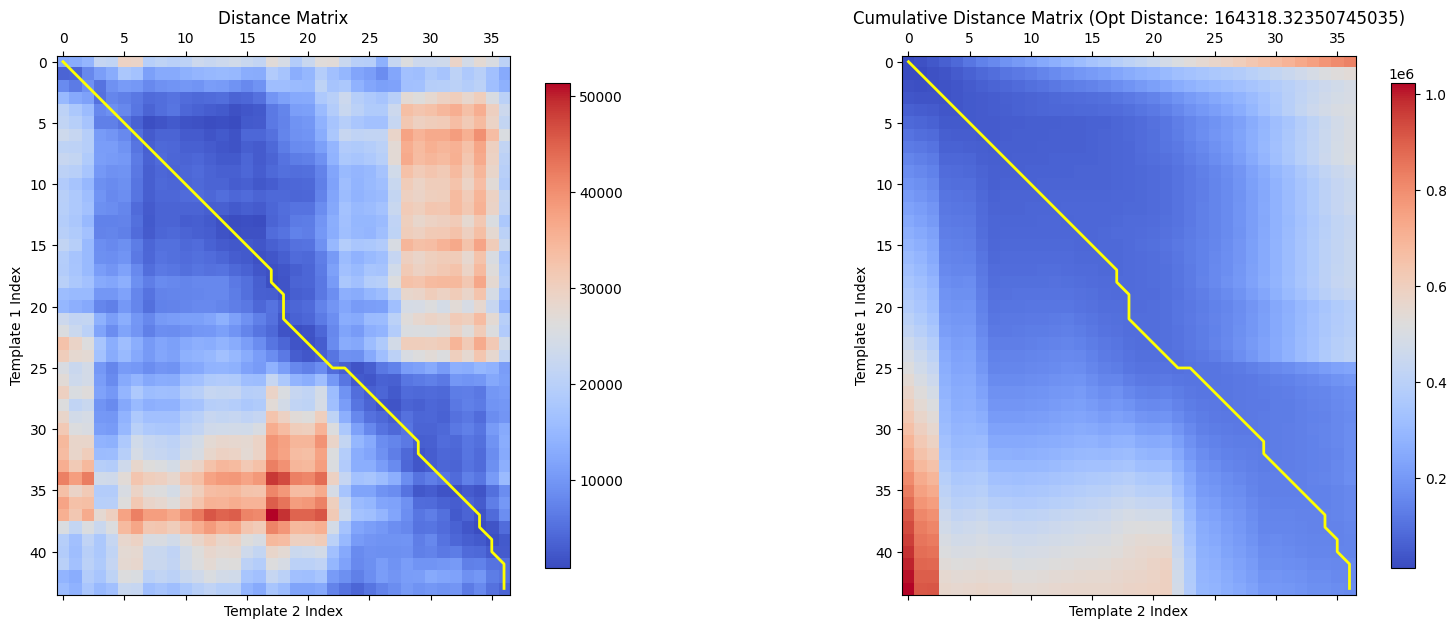

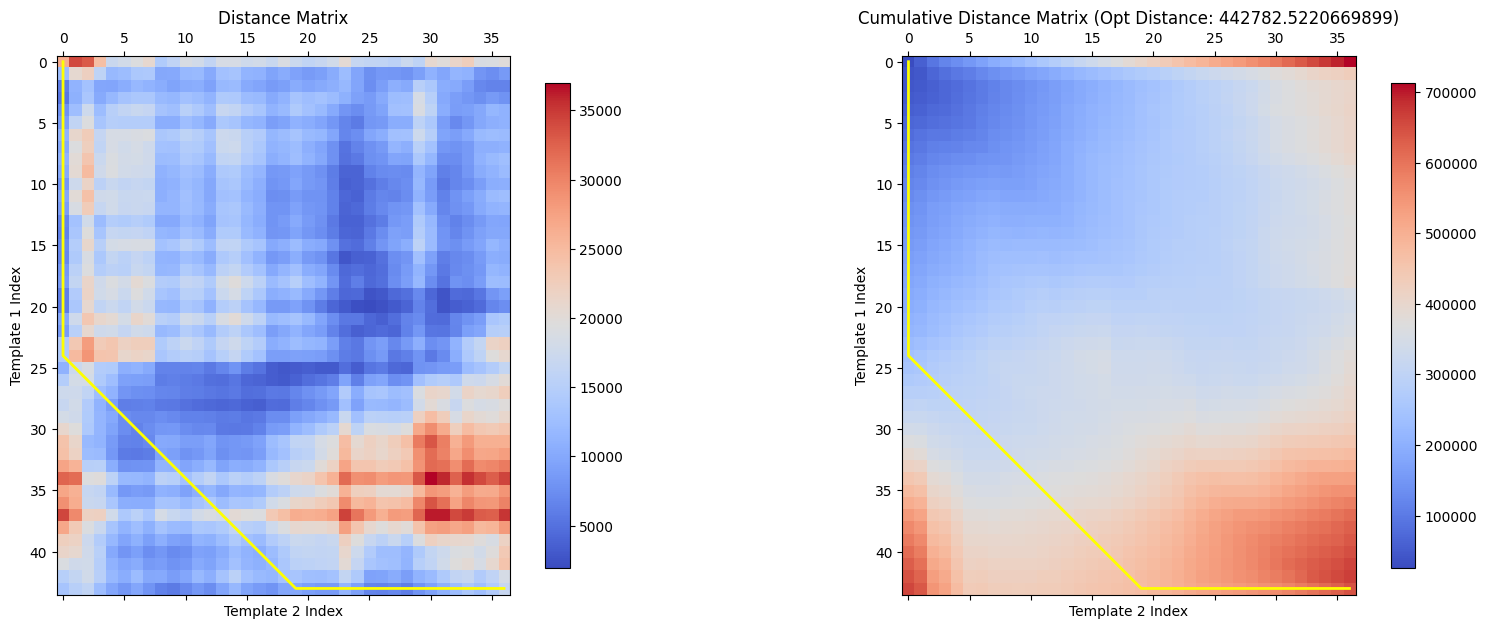

In [12]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def plotDTWpath(template1, template2):
    opt_distance, path, D, DTW_cumulate_Matrix = vectorDTW(template1, template2)
    path_x, path_y = zip(*path)  # Unpack path coordinates for plotting

    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    # Plot Distance Matrix
    cax1 = ax[0].matshow(D, cmap='coolwarm')
    fig.colorbar(cax1, ax=ax[0], shrink=0.9)
    ax[0].plot(path_y, path_x, color="yellow", linewidth=2)
    ax[0].set_title("Distance Matrix")
    ax[0].set_xlabel("Template 2 Index")
    ax[0].set_ylabel("Template 1 Index")

    # Plot Cumulative Distance Matrix
    cax2 = ax[1].matshow(DTW_cumulate_Matrix, cmap='coolwarm')
    fig.colorbar(cax2, ax=ax[1], shrink=0.9)
    ax[1].plot(path_y, path_x, color="yellow", linewidth=2)
    ax[1].set_title(f'Cumulative Distance Matrix (Opt Distance: {opt_distance})')
    ax[1].set_xlabel("Template 2 Index")
    ax[1].set_ylabel("Template 1 Index")

    plt.show()
    print("\n")

# Example for the same digit (e.g., '0_rep_2.wav' vs 0)
plotDTWpath(test_mfccs['0_rep_2'], template_mfccs[0])

# Example for two different digits (e.g., '0_rep_2.wav' vs 1)
plotDTWpath(test_mfccs['0_rep_2'], template_mfccs[1])



**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [13]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


In [14]:

results = []

for test_key, mfcc_test in test_mfccs.items():
    min_distance = float('inf')
    predicted_digit = None

    # Compare test MFCC against all templates
    for digit, mfcc_template in template_mfccs.items():
        distance, path, D, DTW_cumulate_Matrix = vectorDTW(mfcc_test, mfcc_template)
        # print(mfcc_test.shape,mfcc_template.shape)
        if distance < min_distance:
            min_distance = distance
            predicted_digit = digit

    # Store the results
    actual_digit = test_key.split('_')[0]  # file format is digit_rep_no.wav
    print(f'Actual Digit: {actual_digit} Predicted Digit: {predicted_digit} Min Distance: {min_distance}')
    results.append((actual_digit, predicted_digit, min_distance))


Actual Digit: 0 Predicted Digit: 0 Min Distance: 164318.32350745035
Actual Digit: 0 Predicted Digit: 0 Min Distance: 170401.23554641125
Actual Digit: 0 Predicted Digit: 0 Min Distance: 152538.68015029444
Actual Digit: 1 Predicted Digit: 1 Min Distance: 87945.42602948783
Actual Digit: 1 Predicted Digit: 1 Min Distance: 78689.15961785676
Actual Digit: 1 Predicted Digit: 1 Min Distance: 82160.77785515852
Actual Digit: 2 Predicted Digit: 2 Min Distance: 121335.4824754644
Actual Digit: 2 Predicted Digit: 2 Min Distance: 84361.03990144408
Actual Digit: 2 Predicted Digit: 2 Min Distance: 113315.14861777688
Actual Digit: 3 Predicted Digit: 3 Min Distance: 91787.4312872756
Actual Digit: 3 Predicted Digit: 3 Min Distance: 88017.83621777674
Actual Digit: 3 Predicted Digit: 3 Min Distance: 107189.30798105251
Actual Digit: 4 Predicted Digit: 4 Min Distance: 123987.5410476133
Actual Digit: 4 Predicted Digit: 4 Min Distance: 108989.32013272317
Actual Digit: 4 Predicted Digit: 4 Min Distance: 123759.6

In [15]:
# Evaluate results
correct = sum(1 for actual, predicted, _ in results if int(actual) == predicted)
total = len(results)
# print(results)
accuracy = correct / total * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


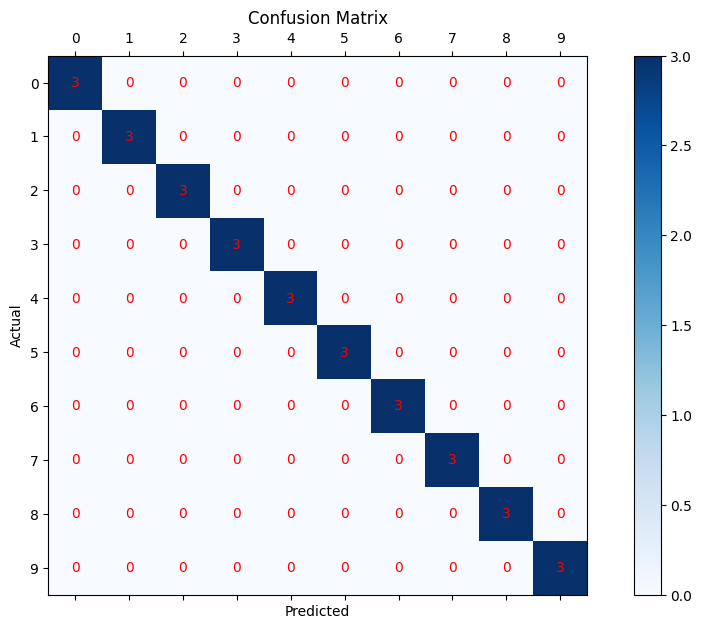

In [16]:
#####################################
######## CONFUSION MATRIX ###########
#####################################

cm = np.zeros((10, 10), dtype=int)
for actual, predicted, _ in results:
    actual_index = int(actual)
    predicted_index = int(predicted)
    cm[actual_index, predicted_index] += 1

def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 7))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # Adding text annotation values on each cell
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='red')

    plt.show()

digit_labels = [str(i) for i in range(10)]

plot_confusion_matrix(cm, digit_labels)


<b> Report your observations </b>

1.

2.

3.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [17]:
######### UNCOMMENT THIS IF TDIGITS DATASET IS NOT IMPORTED INTO CONTENTS/ OF THIS COLLAB FILE ##########

# from google.colab import drive
# drive.mount('/content/drive')

# # Unzip the dataset
# !unzip '/content/drive/MyDrive/MultiSpeakerDigitData_modified.zip'

In [24]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import os

#Performance evaluation of Isolated digit recognition system on TDIGITS data

import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy

def compute_mfcc(filename):
    (rate,sig) = wav.read(filename)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn


def load_data(directory):
    data = {}
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                path = os.path.join(root, file)
                digit = file.split('_')[0]  #filename format is digit_speaker_index.wav
                index = file.split('.wav')[0]
                index = index.split('_')[2]
                if digit not in data:
                    data[digit] = []
                if(int(index)<5):
                  data[digit].append(compute_mfcc(path))
    return data

data = load_data('./content/MultiSpeakerDigitData_modified')



In [25]:
# print(len(data['0']))

In [26]:
# a = template_mfccs[0]
# b = data['1'][1]
# print(a.shape)
# print(b.shape)

# distance, path, D, DTW_cumulate_Matrix = vectorDTW(b, a)
# print(distance)

In [27]:
def classify_digit(test_mfcc, template_mfccs):
    # distances = {}
    # for digit, mfccs in templates.items():
    #     # Compare against the first occurrence of each digit as a simple template
    #     distance, _, _, _ = vectorDTW(test_mfcc, mfccs[0])
    #     distances[digit] = distance
    # return min(distances, key=distances.get)

    min_distance = float('inf')
    predicted_digit = None

    # Compare test MFCC against all templates
    for digit, mfcc_template in template_mfccs.items():
        # print(test_mfcc.shape,mfcc_template.shape)
        distance, path, D, DTW_cumulate_Matrix = vectorDTW(test_mfcc,mfcc_template)
        # print(digit,distance)
        if distance < min_distance:
            min_distance = distance
            predicted_digit = digit

    return predicted_digit, min_distance

# Evaluation
results = []
for digit, mfccs in data.items():
    for mfcc in mfccs:
        predicted_digit, min_dist = classify_digit(mfcc, template_mfccs)
        results.append((digit, predicted_digit))
        print(f'Actual Digit: {digit} Predicted Digit: {predicted_digit} Min Distance: {min_dist}')

# Calculate accuracy
correct = sum(1 for actual, predicted in results if int(actual) == predicted)
accuracy = correct / len(results) * 100
print(f"Accuracy: {accuracy:.2f}%")


Actual Digit: 2 Predicted Digit: 8 Min Distance: 104636.46645179072
Actual Digit: 2 Predicted Digit: 8 Min Distance: 158642.6405445212
Actual Digit: 2 Predicted Digit: 6 Min Distance: 140041.9741727184
Actual Digit: 2 Predicted Digit: 6 Min Distance: 188430.62026732968
Actual Digit: 2 Predicted Digit: 6 Min Distance: 148055.19043467796
Actual Digit: 2 Predicted Digit: 6 Min Distance: 149562.91714844882
Actual Digit: 2 Predicted Digit: 8 Min Distance: 154018.9020797376
Actual Digit: 2 Predicted Digit: 2 Min Distance: 179618.34790415276
Actual Digit: 2 Predicted Digit: 8 Min Distance: 155713.41854863847
Actual Digit: 2 Predicted Digit: 6 Min Distance: 164319.52851321682
Actual Digit: 2 Predicted Digit: 8 Min Distance: 212797.95394565255
Actual Digit: 2 Predicted Digit: 8 Min Distance: 172094.8224517877
Actual Digit: 2 Predicted Digit: 6 Min Distance: 157955.52148591843
Actual Digit: 2 Predicted Digit: 6 Min Distance: 169848.41945895943
Actual Digit: 2 Predicted Digit: 6 Min Distance: 133

In [30]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker

#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy

def compute_mfcc(filename):
    (rate,sig) = wav.read(filename)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

# Setting the same reference and testing speaker
reference_speaker = 'jackson'
testing_speaker = 'jackson'

# Loading data
def load_data(data, directory, name, num):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                path = os.path.join(root, file)
                digit = file.split('_')[0]  #filename format is digit_speaker_index.wav
                speaker = file.split('_')[1]
                index = file.split('.wav')[0]
                index = index.split('_')[2]
                if digit not in data:
                    data[digit] = []
                if(int(index)<num and speaker==name):
                  data[digit].append(compute_mfcc(path))
    # return data

data = {}
# Adding training data, first values will be corresspongind to reference speaker
load_data(data,'./content/MultiSpeakerDigitData_modified',reference_speaker,1)

# print(len(data['0']))

# Adding testing data, rest values will be corresponding to testing speaker
load_data(data,'./content/MultiSpeakerDigitData_modified',testing_speaker,20)
# print(len(data['0']))

def classify_digit(test_mfcc, templates):
    distances = {}
    for digit, mfccs in templates.items():
        #The first occurrence of each digit will act as reference/tempelate
        distance, _, _, _ = vectorDTW(test_mfcc, mfccs[0])
        distances[digit] = distance
    return min(distances, key=distances.get)

# Evaluation
results = []
for digit, mfccs in data.items():
    for mfcc in mfccs:
        predicted_digit = classify_digit(mfcc, data)
        # print(type(predicted_digit))
        results.append((digit, predicted_digit))
        print(f'Actual Digit: {digit} Predicted Digit: {predicted_digit}')

# Calculate accuracy
correct = sum(1 for actual, predicted in results if actual == predicted)
Same_speaker_accuracy = correct / len(results) * 100

print(f"Same Speaker Accuracy: {Same_speaker_accuracy:.2f}%")




Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Pred

In [31]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers

#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

import scipy.io.wavfile as wav
# !pip -q install python_speech_features
# !pip -q install speechpy
from python_speech_features import mfcc
import speechpy

def compute_mfcc(filename):
    (rate,sig) = wav.read(filename)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

reference_speaker = 'nicolas'
testing_speaker = 'jackson'

# Loading data
def load_data(data, directory, name, num):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                path = os.path.join(root, file)
                digit = file.split('_')[0]  #filename format is digit_speaker_index.wav
                speaker = file.split('_')[1]
                index = file.split('.wav')[0]
                index = index.split('_')[2]
                if digit not in data:
                    data[digit] = []
                if(int(index)<num and speaker==name):
                  data[digit].append(compute_mfcc(path))
    # return data

data = {}
# Adding training data, first values will be corresspongind to reference speaker
load_data(data,'./content/MultiSpeakerDigitData_modified',reference_speaker,1)

# print(len(data['0']))

# Adding testing data, rest values will be corresponding to testing speaker
load_data(data,'./content/MultiSpeakerDigitData_modified',testing_speaker,20)
# print(len(data['0']))

def classify_digit(test_mfcc, templates):
    distances = {}
    for digit, mfccs in templates.items():
        #The first occurrence of each digit will act as reference/tempelate
        distance, _, _, _ = vectorDTW(test_mfcc, mfccs[0])
        distances[digit] = distance
    return min(distances, key=distances.get)

# Evaluation
results = []
for digit, mfccs in data.items():
    for mfcc in mfccs:
        predicted_digit = classify_digit(mfcc, data)
        # print(type(predicted_digit))
        results.append((digit, predicted_digit))
        print(f'Actual Digit: {digit} Predicted Digit: {predicted_digit}')

# Calculate accuracy
correct = sum(1 for actual, predicted in results if actual == predicted)
different_speaker_accuracy = correct / len(results) * 100

print(f"Different Speaker Accuracy: {different_speaker_accuracy:.2f}%")

Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 2 Predicted Digit: 2
Actual Digit: 2 Predicted Digit: 3
Actual Digit: 7 Predicted Digit: 7
Actual Digit: 7 Predicted Digit: 4
Actual Digit: 7 Predicted Digit: 5
Actual Digit: 7 Predicted Digit: 4
Actual Digit: 7 Predicted Digit: 4
Actual Digit: 7 Predicted Digit: 3
Actual Digit: 7 Predicted Digit: 4
Actual Digit: 7 Pred

In [32]:
print(f"Same Speaker Accuracy: {Same_speaker_accuracy:.2f}%")
print(f"Different Speaker Accuracy: {different_speaker_accuracy:.2f}%")

Same Speaker Accuracy: 88.57%
Different Speaker Accuracy: 40.48%


In [33]:
#Suggest some of the changes to improve the system performance.



<b> Report your observations </b>

1.

2.

3.

